In [51]:
import os

#先導入資料處理會用到的模組
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
from pandas_profiling import ProfileReport

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [52]:
trainset = pd.read_csv('train.csv', index_col = 0)
X = trainset.drop('Y', axis = 1)
y = trainset['Y']

<BarContainer object of 3 artists>

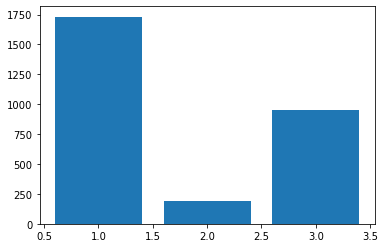

In [53]:
# 檢視label的比例(極度不平衡)
plt.bar(y.value_counts(ascending=True).index, y.value_counts(ascending=True))

In [54]:
# 捨棄SMOTE
# # smote for oversampling
# # tomek-link undersampling
# smt = SMOTETomek()
# X_smt, y_smt = smt.fit_resample(X, y)

In [55]:
# 初步建立RF模型挑選變數
rf = RandomForestClassifier(n_estimators=500, class_weight='balanced')
imp_records = {feature:[] for feature in X_smt.columns}

for i in range(15):
    X_train,X_test,y_train,y_test = train_test_split(X_smt, y_smt, test_size=0.2)
    model = rf.fit(X_train, y_train)
    for feature, imp in zip(model.feature_names_in_, model.feature_importances_):
        imp_records[feature].append(imp)
imp_mean_std = {feature:[np.mean(imp_records[feature]), np.std(imp_records[feature])] for feature in imp_records}

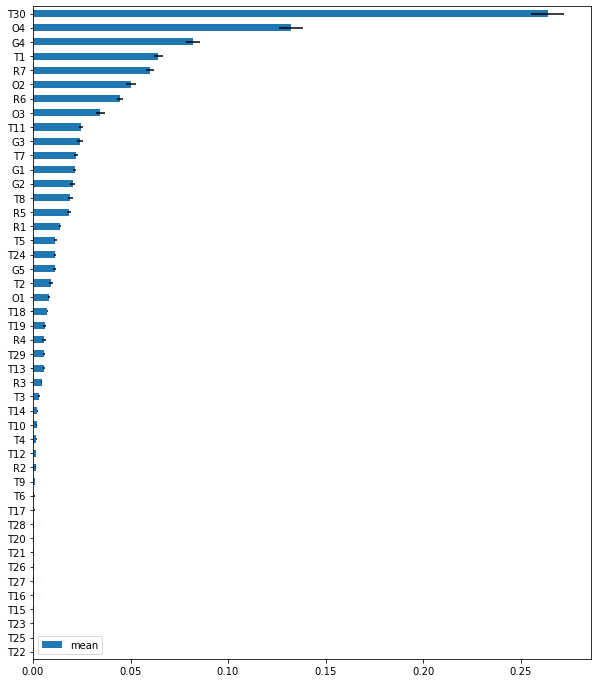

In [56]:
# 視覺化feature importance
imp_mean_std = {feature:[np.mean(imp_records[feature]), np.std(imp_records[feature])] for feature in imp_records}
df_imp = pd.DataFrame(imp_mean_std, index=['mean', 'std']).T.sort_values(by = 'mean')
feature_imp_plot = df_imp.plot(kind = 'barh', y = 'mean', xerr = 'std', figsize = (10, 12)).get_figure()
feature_imp_plot.savefig(os.getcwd()+'/feature_importance.png')

In [61]:
# 選擇大於0.01的製作成dataset儲存
# 分成兩種：SMOTETomek後的以及原始的
features_seleted = df_imp[df_imp['mean']>0.014].index
# X_smt_featured = X_smt.loc[:,features_seleted]
X_featured = X.loc[:,features_seleted]
# dataset_smt = X_smt_featured.join(y_smt, how = 'left')
dataset_ori = X_featured.join(y, how = 'left')
# dataset_smt.to_csv(os.getcwd()+'/smt_feature_set.csv')
dataset_ori.to_csv(os.getcwd()+'/ori_feature_set.csv')

In [60]:
len(features_seleted)

15